# ${\color{orchid}{ชื่อหัวข้อ \ (Project \ Topic):  }}$  การทำนายมูลค่าทองคำด้วยมูลค่าเงินดอลลาร์เทียบเป็นบาทและมูลค่าน้ำมัน

## ${\color{orchid}{ชื่อทีม \ (Team name \ Topic): WONDER \ GIRL}}$ 




## ${\color{orchid}{สมาชิก \ (Members \ Topic): }}$ 

1.   นางสาวชนิสรา แสงใส   623021015-8
2.   นายกรวิชญ์	ทะรังศรี    613020188-1
3.   นายสุภทัต	ขุนจันทร์	  613020566-5

# ${\color{dodgerblue}{ แรงบรรดาลใจในการเลือกหัวข้อนี้ \ (Motivation): }}$


เนื่องจากทองคำเป็นทรัพย์ที่นับวันจะมีมูลค่าสูงขึ้นเรื่อยๆเพราะต่อให้สถานการณ์โลกมีความผันผวนมากน้อยเพียงใด แต่ราคาทองคำ และความต้องการของนักลงทุนหรือคนทั่วไปก็ยังมีแนวโน้มสูงขึ้นเรื่อยๆประกอบกับสหรัฐอเมริกาเป็นประเทศมหาอำนาจ ทำให้กลุ่มของพวกเราให้ความสนใจเกี่ยวกับความสัมพันธ์ระหว่างเศรษฐกิจของจีน เมื่อกำหนดให้ราคาเงินดอลล่าแทนเศรษฐกิจของสหรัฐอเมริกาและราคาของทองคำแทนอุปสงค์ของคนทั้งโลก โดยโมเดลที่จะใช้คือ LinearRegression()

#${\color{royalblue}{คำถามที่น่าสนใจเกี่ยวกับปัญหา \ (Interested \ Questions) :}}$ 

ลิตส์ของคำถามที่นักศึกษาร่วมกันอภิปรายแล้วให้ความสนใจ และต้องการหาคำตอบโดยอาศัยกระบวนการ Data Engineering and Data Science 

---

1.   ราคาทองคำและค่าเงินดอลล่ามีความสัมพันธ์กันอย่างไร
2. จากข้อมูลที่นำมาใช้วิเคราะห์สามารถพยากรณ์ราคาทองทองคำหรือค่าเงินดอลล่าได้อย่างไร
3. จากคำตอบที่ได้บ่งบอกถึงความสามารถได้การพยากรณ์ได้มากน้อยเพียงใด



---


# ${\color{limegreen}{ข้อมูลที่เกี่ยวข้องในการใช้ตอบคำถามที่สนใจ}}$ ${\color{limegreen}{\ What \ are \ the \ Data \ related \ to \ answer \ the  \ questions? :}}$ 




*   ราคาทองและค่าเงินดอลลาร์ในแต่ละวัน
*   ราคาน้ำมันดิบ



#  ${\color{gold}{ข้อมูลที่จะนำมาวิเคราะห์ \ (Dataset): }}$


1. ราคาทองคำ

2. ค่าเงินดอลล่า

3. ราคาน้ำมันดิบ

## ${\color{gold}{คำอธิบายเกี่ยวกับข้อมูล โดยคร่าว:}}$


ราคาทองคำและค่าเงินดอลลาร์ที่นำมาใช้จะเป็นราคาทองที่ตลาดปิดในแต่ละวัน

## ${\color{gold}{แหล่งที่มาของข้อมูล:}}$
ค่าเงินดอลลาร์ : https://th.investing.com/currencies/usd-thb-historical-data?fbclid=IwAR0q6Zxzxyc1nOHEJnYahAHY47p8T3Emu5Lmj4A2-Le-bK1R01pEixeebbE

ราคาน้ำมัน : https://datahub.io/core/oil-prices?fbclid=IwAR1lz2D2Cst1oX1Doeq0V7i4egcUM9A_o6KDAp8e8kw7TMyScm2ys661lSQ



ราคาทอง : https://datahub.io/core/gold-prices?fbclid=IwAR2Y4nqTqSG_iWy_FHfUIzk711MlTyytv66_ztdKMqvaQT__HnqcWBBL-g0

# ${\color{darkorange}{Exploratory \ Data \  Analysis :}}$


## ${\color{darkorange}{1) \ Data \ acquisition \ process :}}$


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gdown --id 1_1u462jys1b301BNfv5vtCAma4eEpB0w
!unzip dataset.zip -d "/content/drive/My Drive/Colab Notebooks/DS Project/"

Downloading...
From: https://drive.google.com/uc?id=1_1u462jys1b301BNfv5vtCAma4eEpB0w
To: /content/dataset.zip
100% 20.0k/20.0k [00:00<00:00, 37.7MB/s]
Archive:  dataset.zip
  inflating: /content/drive/My Drive/Colab Notebooks/DS Project/data.csv  
  inflating: /content/drive/My Drive/Colab Notebooks/DS Project/data.xlsx  
  inflating: /content/drive/My Drive/Colab Notebooks/DS Project/data.csv.xlsx  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [3]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
# !pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

## ${\color{darkorange}{2) \ Data \ cleaning \ process :}}$


ทำการอ่านไฟล์

In [4]:
tmp_data = pd.read_excel("/content/drive/My Drive/Colab Notebooks/DS Project/data.xlsx",  sheet_name="Sheet2")
tmp_data

,Bath/dollar,WTI,Brent,WTI+Brent/2,Gold,date
0,33.025,94.62,108.12,101.370,1243.068,2014-01-01
1,32.525,100.82,108.90,104.860,1298.713,2014-02-01
2,32.425,100.80,107.48,104.140,1336.560,2014-03-01
3,32.355,102.07,107.76,104.915,1299.175,2014-04-01
4,32.830,102.18,109.54,105.860,1288.913,2014-05-01
...,...,...,...,...,...,...
77,30.900,38.31,40.27,39.290,1734.032,2020-06-01
78,31.250,40.71,43.24,41.975,1840.807,2020-07-01
79,31.070,42.34,44.74,43.540,NaN,2020-08-01
80,31.600,NaN,NaN,NaN,NaN,2020-09-01


แปลงไฟล์ให้เป็น csv เพื่องานต่อการทำงาน

In [5]:
tmp_data.to_csv("/content/drive/My Drive/Colab Notebooks/DS Project/data.csv", index=False)
tmp_data

,Bath/dollar,WTI,Brent,WTI+Brent/2,Gold,date
0,33.025,94.62,108.12,101.370,1243.068,2014-01-01
1,32.525,100.82,108.90,104.860,1298.713,2014-02-01
2,32.425,100.80,107.48,104.140,1336.560,2014-03-01
3,32.355,102.07,107.76,104.915,1299.175,2014-04-01
4,32.830,102.18,109.54,105.860,1288.913,2014-05-01
...,...,...,...,...,...,...
77,30.900,38.31,40.27,39.290,1734.032,2020-06-01
78,31.250,40.71,43.24,41.975,1840.807,2020-07-01
79,31.070,42.34,44.74,43.540,NaN,2020-08-01
80,31.600,NaN,NaN,NaN,NaN,2020-09-01


เปลียนชื่อ column ให้อยู่ในรูปแบบเดียวกัน และดูง่าย

In [6]:
tmp_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/DS Project/data.csv",
                   parse_dates=["date"])
tmp_data.rename(columns={'Bath/dollar':'bath/dollar',
                     'WTI' : 'wti',
                     'Brent' : 'brent',
                     'WTI+Brent/2':'oil_price',
                     'Gold' : 'gold'},
                     inplace=True)
tmp_data

,bath/dollar,wti,brent,oil_price,gold,date
0,33.025,94.62,108.12,101.370,1243.068,2014-01-01
1,32.525,100.82,108.90,104.860,1298.713,2014-02-01
2,32.425,100.80,107.48,104.140,1336.560,2014-03-01
3,32.355,102.07,107.76,104.915,1299.175,2014-04-01
4,32.830,102.18,109.54,105.860,1288.913,2014-05-01
...,...,...,...,...,...,...
77,30.900,38.31,40.27,39.290,1734.032,2020-06-01
78,31.250,40.71,43.24,41.975,1840.807,2020-07-01
79,31.070,42.34,44.74,43.540,NaN,2020-08-01
80,31.600,NaN,NaN,NaN,NaN,2020-09-01


drop ค่า NaN ออกและ drop column wti และ brent เพราะไม่ได้นำมาวิเคราะห์

In [7]:
data = tmp_data.dropna().drop(columns = ['wti', 'brent' ])
data

,bath/dollar,oil_price,gold,date
0,33.025,101.370,1243.068,2014-01-01
1,32.525,104.860,1298.713,2014-02-01
2,32.425,104.140,1336.560,2014-03-01
3,32.355,104.915,1299.175,2014-04-01
4,32.830,105.860,1288.913,2014-05-01
...,...,...,...,...
74,32.750,30.610,1593.764,2020-03-01
75,32.460,17.465,1680.030,2020-04-01
76,31.820,28.970,1715.697,2020-05-01
77,30.900,39.290,1734.032,2020-06-01


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 78
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   bath/dollar  79 non-null     float64       
 1   oil_price    79 non-null     float64       
 2   gold         79 non-null     float64       
 3   date         79 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(3)
memory usage: 3.1 KB


In [9]:
data.isna().sum()

bath/dollar    0
oil_price      0
gold           0
date           0
dtype: int64

In [10]:
data.columns

Index(['bath/dollar', 'oil_price', 'gold', 'date'], dtype='object')

In [11]:
data.shape

(79, 4)

###ตรวจสอบ Sample statistics

In [12]:
data.describe()

,bath/dollar,oil_price,gold
count,79.000000,79.000000,79.000000
mean,33.055127,59.834557,1302.130646
std,1.660873,19.667814,148.394541
min,29.770000,17.465000,1068.317000
25%,31.860000,47.407500,1222.420000
50%,32.765000,56.835000,1273.580000
75%,34.590000,66.232500,1329.713500
max,36.370000,108.795000,1840.807000


###กราฟระหว่างราคาทองกับค่าเงินดอลลาร์

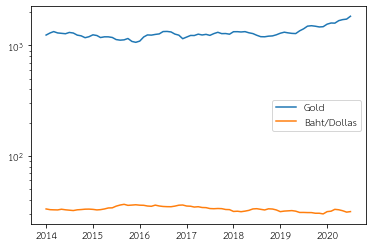

In [13]:
x  = data.gold
y = data["bath/dollar"]
plt.yscale("log")
plt.plot(data.date , x, label="Gold")
plt.plot(data.date, y, label="Baht/Dollas")
plt.plot()
plt.legend()
plt.show()

###กราฟระหว่างราคาทองกับราคาน้ำมัน

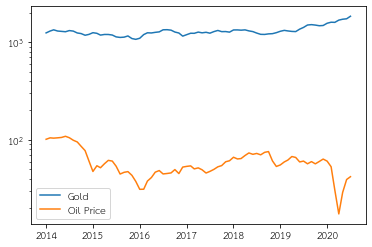

In [14]:
x  = data.gold
y = data.oil_price
plt.yscale("log")
plt.plot(data.date , x, label="Gold")
plt.plot(data.date, y, label="Oil Price")
plt.plot()
plt.legend()
plt.show()

จากกราฟสองอันข้างบนจะเห็นว่า ราคาทองกับค่าเงินดอลลาร์ กับ ราคาทองกับราคาน้ำมัน มี range ห่างกันมากทำให้ดูความสัมพันธ์ได้ยาก

###ลอง plot แยก

Text(0, 0.5, 'Oil price (Baht)')

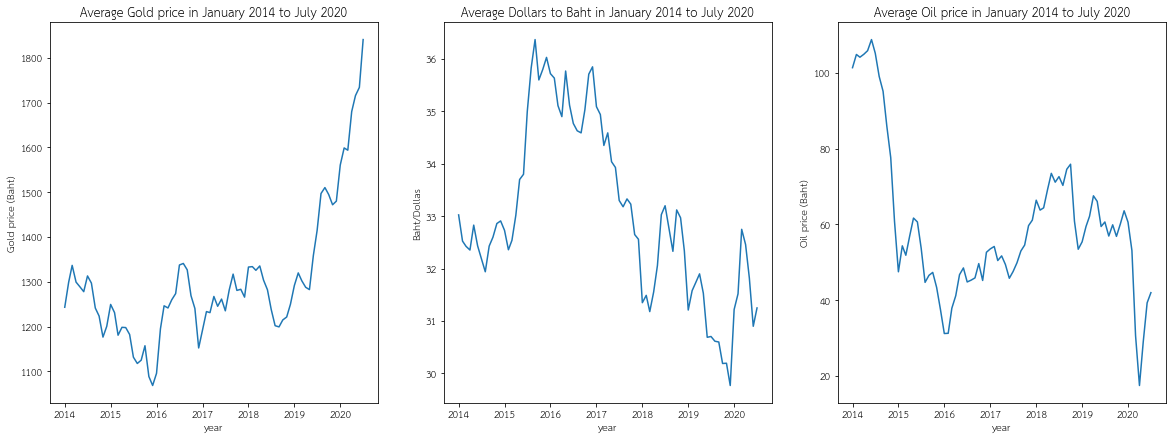

In [15]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10*2, 7))

x  = data.gold
y = data["bath/dollar"]
z = data.oil_price

ax1.plot(data.date , x, label="Gold",)
ax1.set_title("Average Gold price in January 2014 to July 2020")
ax1.set_xlabel("year")
ax1.set_ylabel("Gold price (Baht)")

ax2.plot(data.date, y, label="Baht/Dollas")
ax2.set_title("Average Dollars to Baht in January 2014 to July 2020")
ax2.set_xlabel("year")
ax2.set_ylabel("Baht/Dollas")

ax3.plot(data.date, z, label="oil_price")
ax3.set_title("Average Oil price in January 2014 to July 2020")
ax3.set_xlabel("year")
ax3.set_ylabel("Oil price (Baht)")


## ${\color{darkorange} {3) \ Explore \ Global \ Properties:}} $

plot ดูค่าความสัมพันธ์

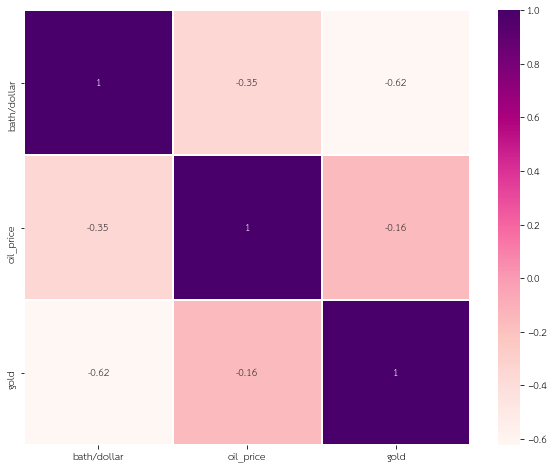

In [16]:
import seaborn as sns
fig,ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(data.corr(),
                 cmap="RdPu",
                 annot=True,
                 linewidths=1)

## ${\color{darkorange} {4) \ Explore \ Local \ Properties:}} $

### EDA ตอบวัตถุประสงค์
* เพื่อทดสอบความสัมพันธ์ระหว่างมูลค่าทองคำและมูลค่าของเงินดอลลาร์เทียบเป็นบาท
* เพื่อทดสอบความสัมพันธ์ระหว่างมูลค่าทองคำและมูลค่าของน้ำมัน
* เพื่อใช้ตัวแปรมูลค่าของน้ำมันและมูลค่าของเงินดอลลาร์เทียบเป็นบาทมาทำนายค่าของทองคำ


#### 1. เพื่อทดสอบความสัมพันธ์ระหว่างมูลค่าทองคำและมูลค่าของเงินดอลลาร์เทียบเป็นบาท

จะเห็นว่า ความสัมพันธ์ระหว่างมูลค่าทองคำ(gold)และมูลค่าของเงินดอลลาร์เทียบเป็นบาท(bath/dollar) มีค่า corelation เท่ากับ - 0.62 

#### 2. เพื่อทดสอบความสัมพันธ์ระหว่างมูลค่าทองคำและมูลค่าของน้ำมัน


จะเห็นว่า ความสัมพันธ์ระหว่างมูลค่าทองคำ(gold)และมูลค่าของน้ำมัน(oil_price) มีค่า corelation เท่ากับ - 0.16

# ${\color{red} {Modeling:}} $


## ${\color{red} {Model \ Selection:}} $

#### 3. เพื่อใช้ตัวแปรมูลค่าของน้ำมันและมูลค่าของเงินดอลลาร์เทียบเป็นบาทมาทำนายค่าของทองคำ โดยใช้โมเดล LinearRegression

In [17]:
data

,bath/dollar,oil_price,gold,date
0,33.025,101.370,1243.068,2014-01-01
1,32.525,104.860,1298.713,2014-02-01
2,32.425,104.140,1336.560,2014-03-01
3,32.355,104.915,1299.175,2014-04-01
4,32.830,105.860,1288.913,2014-05-01
...,...,...,...,...
74,32.750,30.610,1593.764,2020-03-01
75,32.460,17.465,1680.030,2020-04-01
76,31.820,28.970,1715.697,2020-05-01
77,30.900,39.290,1734.032,2020-06-01


In [18]:
#Split date column
tmp = data.copy()
tmp["day"] = tmp.date.dt.day
tmp["month"] = tmp.date.dt.month
tmp["year"] = tmp.date.dt.year
tmp.drop(columns=["date"],inplace=True)
tmp

,bath/dollar,oil_price,gold,day,month,year
0,33.025,101.370,1243.068,1,1,2014
1,32.525,104.860,1298.713,1,2,2014
2,32.425,104.140,1336.560,1,3,2014
3,32.355,104.915,1299.175,1,4,2014
4,32.830,105.860,1288.913,1,5,2014
...,...,...,...,...,...,...
74,32.750,30.610,1593.764,1,3,2020
75,32.460,17.465,1680.030,1,4,2020
76,31.820,28.970,1715.697,1,5,2020
77,30.900,39.290,1734.032,1,6,2020


In [19]:
x = tmp.drop(columns=['gold']).fillna(0)
y = tmp.gold.fillna(0)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()

In [21]:
# Train : 75% / Test: 25%
np.random.seed(40)
x_train,x_test, y_train,y_test = train_test_split(tmp.drop(columns=["gold"]),
                                                  tmp["gold"],
                                                  test_size=0.25)

model.fit(x_train,y_train)
model.score(x_test, y_test)

0.6787104710857216

In [22]:
tmp["gold_predict"] = np.append(model.predict(x_train),model.predict(x_test))
tmp["differnt"] = tmp.gold_predict - tmp.gold
tmp

,bath/dollar,oil_price,gold,day,month,year,gold_predict,differnt
0,33.025,101.370,1243.068,1,1,2014,1185.191883,-57.876117
1,32.525,104.860,1298.713,1,2,2014,1227.140507,-71.572493
2,32.425,104.140,1336.560,1,3,2014,1217.655886,-118.904114
3,32.355,104.915,1299.175,1,4,2014,1206.743880,-92.431120
4,32.830,105.860,1288.913,1,5,2014,1419.277178,130.364178
...,...,...,...,...,...,...,...,...
74,32.750,30.610,1593.764,1,3,2020,1408.038949,-185.725051
75,32.460,17.465,1680.030,1,4,2020,1452.147931,-227.882069
76,31.820,28.970,1715.697,1,5,2020,1450.548172,-265.148828
77,30.900,39.290,1734.032,1,6,2020,1211.749927,-522.282073


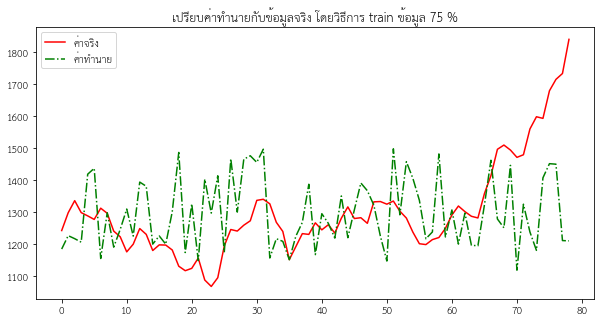

In [23]:
x = tmp.index
y1 = tmp.gold
y2 = tmp.gold_predict

fig,ax = plt.subplots(figsize=(10,5))
ax = plt.plot(x,y1, "-r", y2, "-.g")
plt.legend(["ค่าจริง","ค่าทำนาย"])
plt.title("เปรียบค่าทำนายกับข้อมูลจริง โดยวิธีการ train ข้อมูล 75 %");

## ${\color{red} {Split \  Data}} $

In [24]:
X = np.arange(0,79,1)
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78])

In [25]:
def my_split(X,nTrain, nTest):
  D = []
  for i in range(nTrain,len(X)):
    x_index = X[i-nTrain:i]
    pre_index = X[i:i+nTest]
    D.append( (x_index, pre_index) )
  return (D)

def my_split_df(df,nTrain, nTest):
  D = []
  for i in range(nTrain,len(X)):
    train_df = df.iloc[i-nTrain:i]
    test_df = df.iloc[i:i+nTest]
    X_train = train_df.drop(columns=["gold"])
    y_train = train_df.gold
    X_test = test_df.drop(columns=["gold"])
    y_test = test_df.gold
    D.append( (X_train, X_test, y_train, y_test) )
  return (D)

In [26]:
my_split(list(range(79)),12,1)

[([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], [12]),
 ([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [13]),
 ([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], [14]),
 ([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], [15]),
 ([4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [16]),
 ([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], [17]),
 ([6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], [18]),
 ([7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], [19]),
 ([8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [20]),
 ([9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], [21]),
 ([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], [22]),
 ([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22], [23]),
 ([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [24]),
 ([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], [25]),
 ([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], [26]),
 ([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26], [27]),
 ([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27], [28]),
 ([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28], 

In [27]:
tmp2 = data.copy()
tmp2["month"] = tmp2.date.dt.month
tmp2["year"] = tmp2.date.dt.year
tmp2.drop(columns=["date"],inplace=True)

In [28]:
train_test_list = my_split_df(tmp2, 12, 1)
train_test_list

[(    bath/dollar  oil_price  month  year
  0        33.025    101.370      1  2014
  1        32.525    104.860      2  2014
  2        32.425    104.140      3  2014
  3        32.355    104.915      4  2014
  4        32.830    105.860      5  2014
  5        32.435    108.795      6  2014
  6        32.190    105.180      7  2014
  7        31.940     99.075      8  2014
  8        32.430     95.150      9  2014
  9        32.600     85.915     10  2014
  10       32.860     77.615     11  2014
  11       32.910     60.815     12  2014,
      bath/dollar  oil_price  month  year
  12        32.73      47.49      1  2015,
  0     1243.068
  1     1298.713
  2     1336.560
  3     1299.175
  4     1288.913
  5     1277.857
  6     1312.989
  7     1297.005
  8     1241.330
  9     1223.565
  10    1176.413
  11    1200.440
  Name: gold, dtype: float64,
  12    1249.333
  Name: gold, dtype: float64),
 (    bath/dollar  oil_price  month  year
  1        32.525    104.860      2  2014
  

In [29]:
MSE_score = []
preds_dict = {"True": [],
              "Preds": []}
for X_train,X_test,y_train,y_test in train_test_list:
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  preds_dict["True"].append(y_test.values[0])
  preds_dict["Preds"].append(pred[0])
  MSE_score.append(mean_squared_error(y_test, pred))
(np.mean(MSE_score))

8284.668818579928

In [30]:
preds_df = pd.DataFrame(preds_dict)
preds_df

,True,Preds
0,1249.333,1274.058875
1,1231.100,1265.283039
2,1180.636,1216.497635
3,1198.253,1141.762929
4,1197.684,1125.291255
...,...,...
62,1593.764,1846.761680
63,1680.030,1694.866230
64,1715.697,1695.915969
65,1734.032,1710.183392


In [31]:
new = preds_df.copy()
new["differnt"] = new["Preds"] - new["True"]
new

,True,Preds,differnt
0,1249.333,1274.058875,24.725875
1,1231.100,1265.283039,34.183039
2,1180.636,1216.497635,35.861635
3,1198.253,1141.762929,-56.490071
4,1197.684,1125.291255,-72.392745
...,...,...,...
62,1593.764,1846.761680,252.997680
63,1680.030,1694.866230,14.836230
64,1715.697,1695.915969,-19.781031
65,1734.032,1710.183392,-23.848608


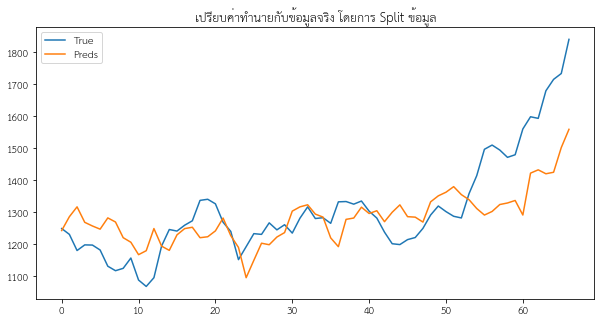

In [42]:
fig,ax = plt.subplots(figsize=(10,5))
preds_df.plot(ax=ax)
plt.title("เปรียบค่าทำนายกับข้อมูลจริง โดยการ Split ข้อมูล");

## ${\color{red} {One \ Hot \ Encoding}} $

### Split feature 'month'

In [33]:
tmp2

,bath/dollar,oil_price,gold,month,year
0,33.025,101.370,1243.068,1,2014
1,32.525,104.860,1298.713,2,2014
2,32.425,104.140,1336.560,3,2014
3,32.355,104.915,1299.175,4,2014
4,32.830,105.860,1288.913,5,2014
...,...,...,...,...,...
74,32.750,30.610,1593.764,3,2020
75,32.460,17.465,1680.030,4,2020
76,31.820,28.970,1715.697,5,2020
77,30.900,39.290,1734.032,6,2020


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

categorical_features = ["month"]
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat", categorical_transformer, categorical_features),
                    ])

model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", LinearRegression())])
  
MSE_score = []
preds_dict = {"True": [],
              "Preds": []}
for X_train,X_test,y_train,y_test in train_test_list:
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  preds_dict["True"].append(y_test.values[0])
  preds_dict["Preds"].append(pred[0])
  MSE_score.append(mean_squared_error(y_test, pred))

(np.mean(MSE_score))

27171.983749149265

In [35]:
preds_df = pd.DataFrame(preds_dict)
preds_df

,True,Preds
0,1249.333,1243.068
1,1231.100,1298.713
2,1180.636,1336.560
3,1198.253,1299.175
4,1197.684,1288.913
...,...,...
62,1593.764,1302.286
63,1680.030,1287.650
64,1715.697,1282.460
65,1734.032,1358.488


In [36]:
new = preds_df.copy()
new["differnt"] = new["Preds"] - new["True"]
new

,True,Preds,differnt
0,1249.333,1243.068,-6.265
1,1231.100,1298.713,67.613
2,1180.636,1336.560,155.924
3,1198.253,1299.175,100.922
4,1197.684,1288.913,91.229
...,...,...,...
62,1593.764,1302.286,-291.478
63,1680.030,1287.650,-392.380
64,1715.697,1282.460,-433.237
65,1734.032,1358.488,-375.544


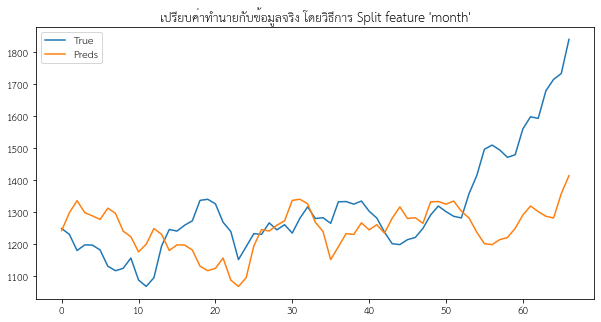

In [37]:
fig,ax = plt.subplots(figsize=(10,5))
preds_df.plot(ax=ax)
plt.title("เปรียบค่าทำนายกับข้อมูลจริง โดยวิธีการ Split feature 'month'");

### Split feature 'month' และ 'year'

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

categorical_features = ["month", "year"]
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat", categorical_transformer, categorical_features),
                    ])

model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", LinearRegression())])
  
MSE_score = []
preds_dict = {"True": [],
              "Preds": []}
for X_train,X_test,y_train,y_test in train_test_list:
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  preds_dict["True"].append(y_test.values[0])
  preds_dict["Preds"].append(pred[0])
  MSE_score.append(mean_squared_error(y_test, pred))

(np.mean(MSE_score))

12960.159315392757

In [39]:
preds_df = pd.DataFrame(preds_dict)
preds_df

,True,Preds
0,1249.333,1243.068000
1,1231.100,1286.342588
2,1180.636,1317.169077
3,1198.253,1268.767727
4,1197.684,1257.347947
...,...,...
62,1593.764,1432.884923
63,1680.030,1420.594727
64,1715.697,1425.286526
65,1734.032,1502.551390


In [40]:
new = preds_df.copy()
new["differnt"] = new["Preds"] - new["True"]
new

,True,Preds,differnt
0,1249.333,1243.068000,-6.265000
1,1231.100,1286.342588,55.242588
2,1180.636,1317.169077,136.533077
3,1198.253,1268.767727,70.514727
4,1197.684,1257.347947,59.663947
...,...,...,...
62,1593.764,1432.884923,-160.879077
63,1680.030,1420.594727,-259.435273
64,1715.697,1425.286526,-290.410474
65,1734.032,1502.551390,-231.480610


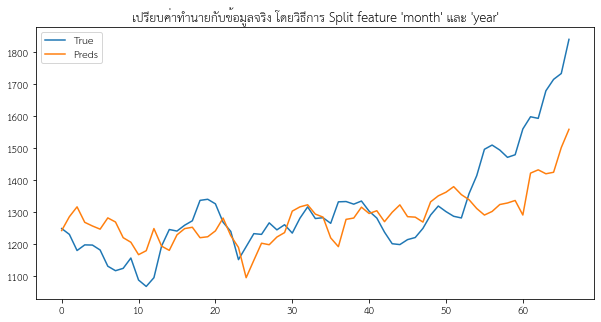

In [41]:
fig,ax = plt.subplots(figsize=(10,5))
preds_df.plot(ax=ax)
plt.title("เปรียบค่าทำนายกับข้อมูลจริง โดยวิธีการ Split feature 'month' และ 'year'");